# <font color='blue'>Seleção de variáveis</font>

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Python Version:', python_version())

# Verificando as versões dos pacotes instalados
pandasVersion = !pip show pandas
matplotlibVersion = !pip show matplotlib
print('Pandas', pandasVersion[1])
print("Matplotlib", matplotlibVersion[1])

Python Version: 3.9.13
Pandas Version: 2.0.2
Matplotlib Version: 3.7.1


## Seleção de variáveis
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>

O objetivo da seleção de variáveis é selecionar as melhores variáveis para treinar o modelo de Machine Learning. Essa técnica também é conhecida como feature selection, ou como seleção de atributos, ou ainda como seleção de características. <br>
As variáveis presentes em um dataset e que são utilizadas nos dados de treino terão grande influência na precisão e no resultado do modelo preditivo. Variáveis irrelevantes terão impacto negativo na performance e variáveis colineares também podem afetar o nível de precisão do modelo. Um exemplo de variáveis colineares é quando no conjunto de dados existem duas variáveis que representam a mesma informação. <br>
A seleção adequada de variáveis ajuda a reduzir o overfitting, aumenta a precisão do modelo e reduz o tempo de treinamento.

</details>

In [2]:
# Importando os pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Coletando os dados
df = pd.read_csv('Dados/Auto-mpg/mtcars.csv')
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### Matriz de correlação
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>

O coeficiente de correlação é uma medida que varia entre -1 e 1. Por meio do sinal, é possível verificar o tipo de relação linear entre as duas variáveis analisadas, ou seja, a direção em que a variável Y aumenta ou diminui em função da variação X. Quanto mais próximo dos valores extremos, mais forte é a correlação entre elas. Logo: <br>
- Se o coeficiente de correlação for positivo, existe uma relação diretamente proporcional entre as variáveis;  <br>
- se o coeficiente de correlação for igual a 1, tem-se uma correlação linear positiva perfeita. <br>
- Se o coeficiente de correlação for negativo, existe uma relação inversamente proporcional entre as variáveis;  <br>
- se o coeficiente de correlação for igual a –1, tem-se uma correlação linear negativa perfeita; e <br>
- Se o coeficiente de correlação for igual a zero, não existe correlação entre as variáveis.

</details>

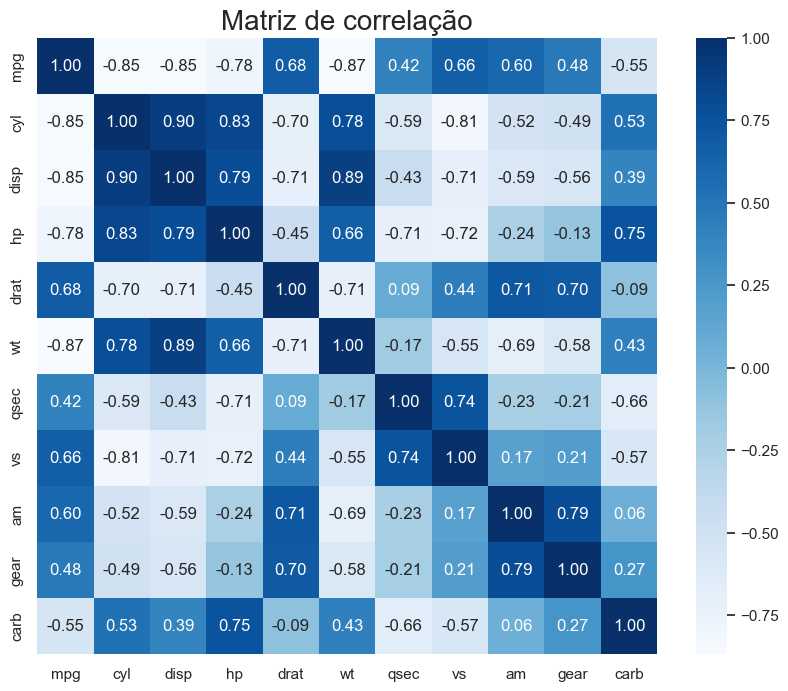

In [4]:
# Matriz de correlação utilizando Seaborn
sns.set(rc = {'figure.figsize':(10,8)}) # define o tamanho do gráfico
sns.heatmap(df[["mpg", "cyl", "disp", "hp", "drat", "wt", "qsec", "vs", "am", "gear", "carb"]].corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Matriz de correlação', fontsize = 20)
plt.show()

### Random Forest Regressor

Importância das variáveis: [0.1157134  0.25797205 0.30155545 0.01575131 0.28297694 0.01779908
 0.00223015 0.00161479 0.00074058 0.00364624]


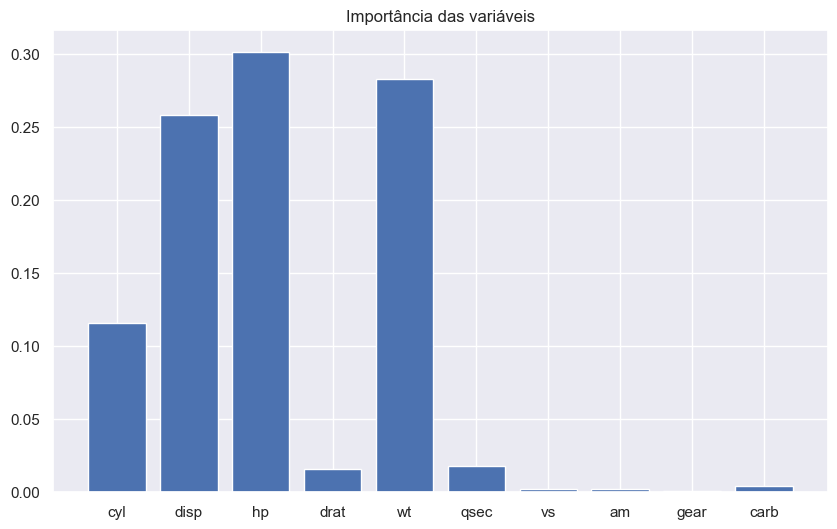

In [5]:
# Carregando o módulo
from sklearn.ensemble import RandomForestRegressor

# Separando as variáveis preditoras e a variável alvo
numeroObservacoes = len(df)
numeroColunas = 10
X = df[["cyl","disp","hp","drat","wt","qsec","vs","am","gear","carb"]].values.reshape((numeroObservacoes, numeroColunas)) # X deve sempre ser uma matriz e nunca um vetor
y = df['mpg'].values # y pode ser um vetor

# Criando o modelo
modelo = RandomForestRegressor()

# Treinamento do modelo
modelo.fit(X, y)

# Extraindo a importância
print("Importância das variáveis: %s" %  modelo.feature_importances_)

# Gráfico com a importância das variáveis
variaveis = ["cyl","disp","hp","drat","wt","qsec","vs","am","gear","carb"]
plt.subplots(figsize=(10, 6))
plt.title("Importância das variáveis")
plt.bar(variaveis, modelo.feature_importances_)
plt.show()

In [6]:
# Carregando o módulo
from sklearn.model_selection import train_test_split

# Divide os dados em treino e teste
Xtreino, Xteste, Ytreino, Yteste = train_test_split(X, y, test_size = 0.2, random_state=23)

In [7]:
# Carregando os módulos
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Criando o modelo
modelo1 = RandomForestRegressor()

# Treinando o modelo
modelo1.fit(Xtreino, Ytreino)

# Fazendo previsões
previsoes1 = modelo1.predict(Xteste)

# Resultado
r2 = r2_score(Yteste, previsoes1)
print("O R2 do modelo é:", r2*100)

# Cáculo do erro
print("O erro do modelo é:", mean_squared_error(previsoes1, Yteste))

O R2 do modelo é: 91.26957255323165
O erro do modelo é: 3.019088714285723


In [8]:
# Separando as variáveis preditoras e a variável alvo
numeroObservacoes = len(df)
numeroVariaveisPreditoras = 4
X = df[["cyl","disp","hp","wt"]].values.reshape((numeroObservacoes, numeroVariaveisPreditoras)) # X deve sempre ser uma matriz e nunca um vetor
y = df['mpg'].values # y pode ser um vetor

In [9]:
# Divide os dados em treino e teste
# random_state garante que o dataset seja dividido sempre com os mesmos dados
Xtreino, Xteste, Ytreino, Yteste = train_test_split(X, y, test_size = 0.2, random_state=23)

In [10]:
# Criando o modelo
modelo2 = RandomForestRegressor()

# Treinando o modelo
modelo2.fit(Xtreino, Ytreino)

# Fazendo previsões
previsoes2 = modelo2.predict(Xteste)

# Resultado
r2 = r2_score(Yteste, previsoes2)
print("O R2 do modelo é:", r2*100)

# Cáculo do erro
print("O erro do modelo é:", mean_squared_error(previsoes2, Yteste))

O R2 do modelo é: 88.63843297058678
O erro do modelo é: 3.9289690000000235


### Eliminação Recursiva de Atributos - Recursive Feature Elimination

Variáveis Selecionadas: [ True  True  True False  True  True False False False False]
Ranking das variáveis: [1 1 1 4 1 1 5 6 2 3]
Número de Melhores variáveis: 5


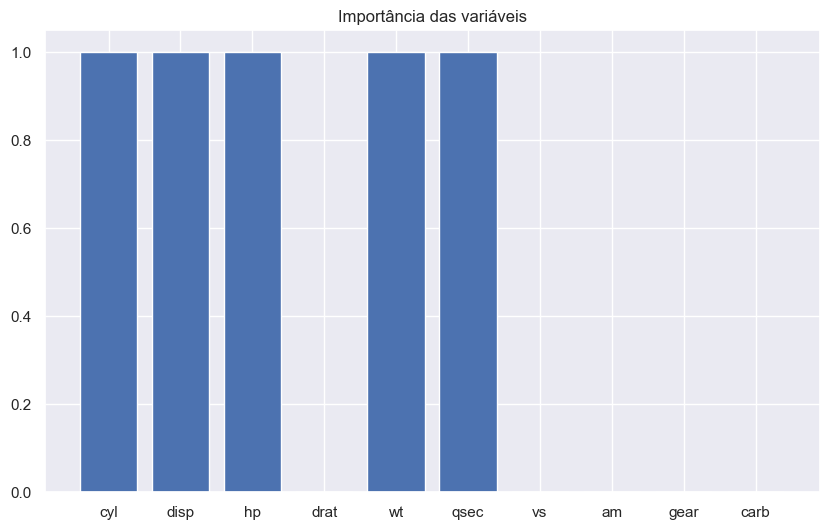

In [11]:
# Carregando os módulos
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor

# Separando as variáveis preditoras e a variável alvo
numeroObservacoes = len(df)
numeroVariaveisPreditoras = 10
X = df[["cyl","disp","hp","drat","wt","qsec","vs","am","gear","carb"]].values.reshape((numeroObservacoes, numeroVariaveisPreditoras)) # X deve sempre ser uma matriz e nunca um vetor
y = df['mpg'].values # y pode ser um vetor

# Criando o modelo
modelo3 = ExtraTreesRegressor()

# Treinando o modelo
modelo3.fit(X, y)

# Criando Eliminação Recursiva de Atributos RFE
eliminacaoRecursiva = RFE(modelo3)

# Treinando Eliminação Recursiva de Atributos RFE
eliminacaoRecursivaTreinada = eliminacaoRecursiva.fit(X, y)

print("Variáveis Selecionadas: %s" % eliminacaoRecursivaTreinada.support_)
print("Ranking das variáveis: %s" % eliminacaoRecursivaTreinada.ranking_)
print("Número de Melhores variáveis: %d" % eliminacaoRecursivaTreinada.n_features_)

# Gráfico com a importância das variáveis
variaveis = ["cyl","disp","hp","drat","wt","qsec","vs","am","gear","carb"]
plt.subplots(figsize=(10, 6))
plt.title("Importância das variáveis")
plt.bar(variaveis, eliminacaoRecursivaTreinada.support_)
plt.show()

### Select K Best


Ranking: [79.56102753 76.51265996 45.45980326 25.96964469 91.375325    6.376702
 23.662241   16.8602788   8.99514442 13.07364559]


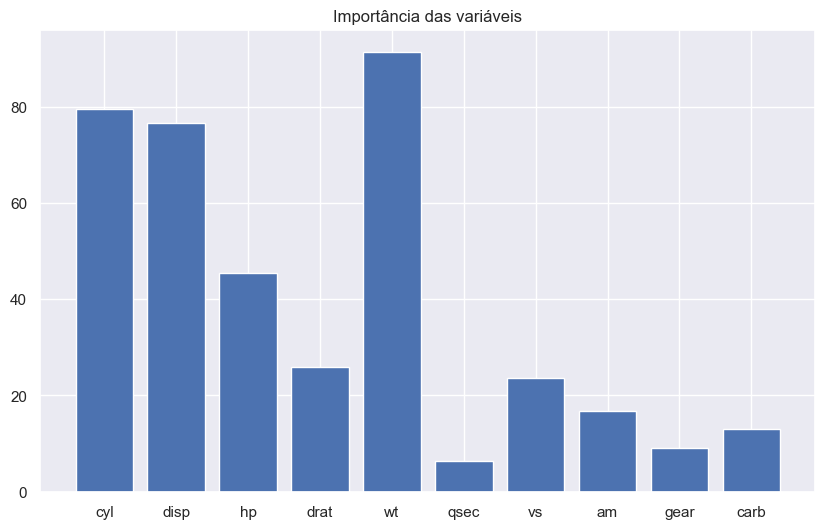

In [12]:
# Carregando os módulos
from sklearn.feature_selection import SelectKBest, f_regression

# Separando as variáveis preditoras e a variável alvo
numeroObservacoes = len(df)
numeroVariaveisPreditoras = 10
X = df[["cyl","disp","hp","drat","wt","qsec","vs","am","gear","carb"]].values.reshape((numeroObservacoes, numeroVariaveisPreditoras)) # X deve sempre ser uma matriz e nunca um vetor
y = df['mpg'].values # y pode ser um vetor

# Cria o objeto SelectKBest
selectkBest = SelectKBest(score_func = f_regression)

# Executa a função em (X, y) e obtém as variáveis selecionadas
selectkBestTreinado = selectkBest.fit(X, y)

# Cria uma lista com o nome das variáveis
variaveis = ["cyl","disp","hp","drat","wt","qsec","vs","am","gear","carb"]

# Resultados
print('\nRanking:', selectkBestTreinado.scores_)
plt.subplots(figsize=(10, 6))
plt.bar(variaveis, selectkBestTreinado.scores_)
plt.title("Importância das variáveis")
plt.show()

### Análise do Componente Principal - Principal component analysis (PCA)

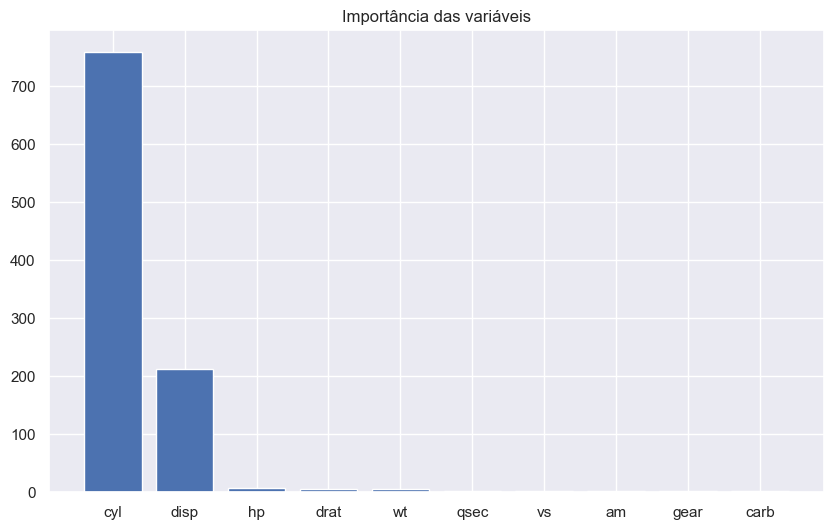

In [13]:
# Carregando o módulo
from sklearn.decomposition import PCA

# Cria o objeto PCA
pca = PCA()

# Treina o modelo e aplica a redução de dimensionalidade 
pca.fit_transform(X)

# Gráfico com a importância das variáveis
variaveis = ["cyl","disp","hp","drat","wt","qsec","vs","am","gear","carb"]
plt.subplots(figsize=(10, 6))
plt.bar(variaveis, pca.singular_values_)
plt.title("Importância das variáveis")
plt.show()